In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from scipy import stats
from sklearn.cluster import KMeans 
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('datam.csv') #importing csv file 
df.head() # Calling first 5 rows of dataset


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,460,70.0,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,45.0,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,75.0,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,74.0,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,28.5,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [3]:
print(df.dtypes)

Brand                object
Model                object
AccelSec            float64
TopSpeed_KmH          int64
Range_Km              int64
Battery_Pack Kwh    float64
Efficiency_WhKm       int64
FastCharge_KmH        int64
RapidCharge          object
PowerTrain           object
PlugType             object
BodyStyle            object
Segment              object
Seats                 int64
PriceEuro             int64
dtype: object


In [8]:
count_nan_in_df = df.isnull().sum()
print(count_nan_in_df)

Brand               0
Model               0
AccelSec            0
TopSpeed_KmH        0
Range_Km            0
Battery_Pack Kwh    0
Efficiency_WhKm     0
FastCharge_KmH      0
RapidCharge         0
PowerTrain          0
PlugType            0
BodyStyle           0
Segment             0
Seats               0
PriceEuro           0
dtype: int64


In [9]:
PowerTrain=df['PowerTrain']
print(PowerTrain)

0      AWD
1      RWD
2      AWD
3      RWD
4      RWD
      ... 
97     FWD
98     AWD
99     AWD
100    AWD
101    AWD
Name: PowerTrain, Length: 102, dtype: object


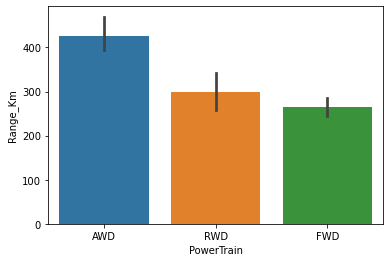

In [10]:
#Creating a graph
PowerTrain=df['PowerTrain']
Range_Km=df['Range_Km']


plt.ylabel("f1-score")
plt.xlabel("Machine Learning Model")
sns.barplot(x= PowerTrain,  y= Range_Km)
plt.show()
    



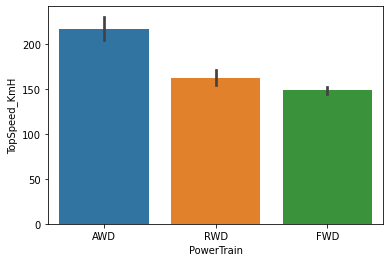

In [11]:
PowerTrain=df['PowerTrain']
bat=df['TopSpeed_KmH']

plt.ylabel("f1-score")
plt.xlabel("Machine Learning Model")
sns.barplot(x= PowerTrain,  y= bat)
plt.show()
    


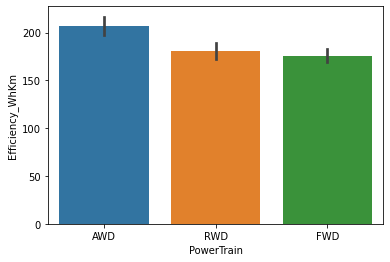

In [12]:
PowerTrain=df['PowerTrain']
bat=df['Efficiency_WhKm']

plt.ylabel("f1-score")
plt.xlabel("Machine Learning Model")
sns.barplot(x= PowerTrain,  y= bat)
plt.show()

In [13]:
# Does a difference in power train effect the range, top speed, efficiency?

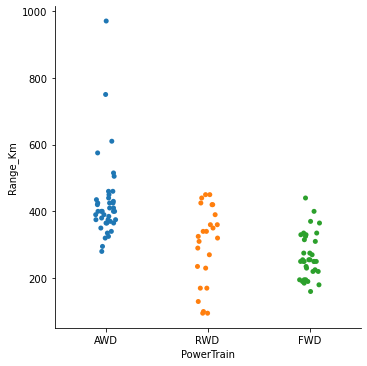

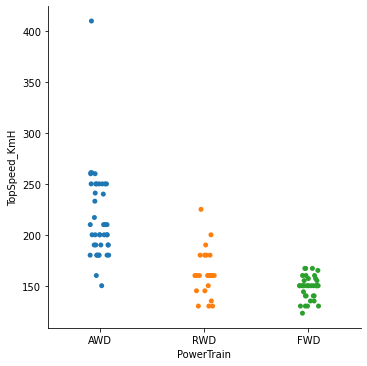

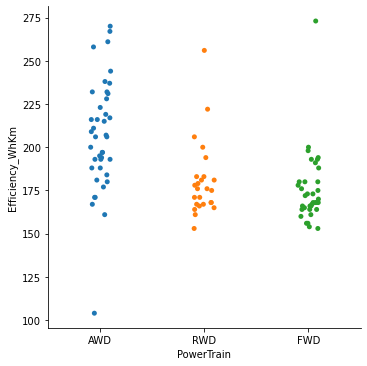

In [14]:
fig, axs = plt.subplots(1,2)
sns.catplot(x="PowerTrain", y="Range_Km", data=df)
sns.catplot(x="PowerTrain", y="TopSpeed_KmH", data=df)
sns.catplot(x="PowerTrain", y="Efficiency_WhKm", data=df)
plt.close(1)


In [6]:
X=df[['TopSpeed_KmH','Battery_Pack Kwh','Range_Km','Efficiency_WhKm']]
X=np.asarray(X)
X

array([[233. ,  70. , 460. , 161. ],
       [160. ,  45. , 270. , 167. ],
       [210. ,  75. , 400. , 181. ],
       [180. ,  74. , 360. , 206. ],
       [145. ,  28.5, 170. , 168. ],
       [250. , 110. , 610. , 180. ],
       [150. ,  35.8, 190. , 168. ],
       [150. ,  45. , 275. , 164. ],
       [225. ,  50. , 310. , 153. ],
       [180. ,  77. , 400. , 193. ],
       [180. ,  80. , 370. , 216. ],
       [144. ,  36. , 220. , 164. ],
       [167. ,  64. , 400. , 160. ],
       [200. ,  80. , 450. , 178. ],
       [165. ,  38.3, 250. , 153. ],
       [160. ,  77. , 440. , 175. ],
       [260. ,  83.7, 375. , 223. ],
       [130. ,  36.8, 195. , 166. ],
       [140. ,  42.5, 220. , 193. ],
       [150. ,  28.9, 185. , 156. ],
       [150. ,  45. , 275. , 164. ],
       [217. ,  72.5, 425. , 171. ],
       [160. ,  52. , 290. , 179. ],
       [240. ,  85. , 425. , 197. ],
       [261. ,  70. , 435. , 167. ],
       [160. ,  77. , 420. , 183. ],
       [160. ,  58. , 350. , 166. ],
 

In [9]:
y=df['PowerTrain']

In [4]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['PowerTrain']= label_encoder.fit_transform(df['PowerTrain'])
 
z=df['PowerTrain'].unique()
z

array([0, 2, 1])

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [18]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(x_train,y_train)
LR

C:\Users\Junaid Iqbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
yhat = LR.predict(x_test)
yhat

array(['FWD', 'RWD', 'FWD', 'RWD', 'FWD', 'RWD', 'RWD', 'FWD', 'FWD',
       'FWD', 'RWD', 'FWD', 'FWD', 'FWD', 'RWD', 'AWD', 'FWD', 'FWD',
       'RWD', 'RWD', 'FWD'], dtype=object)

In [20]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
c=metrics.accuracy_score(y_test, yhat)

Test set Accuracy:  0.47619047619047616


In [21]:
#svm


In [22]:
from sklearn.metrics import confusion_matrix
a = confusion_matrix(y_test,yhat)

In [23]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 

SVC()

In [24]:
yhat1 = clf.predict(x_test)


In [25]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat1))
d=metrics.accuracy_score(y_test, yhat1)

Test set Accuracy:  0.8095238095238095


In [26]:
b = confusion_matrix(y_test,yhat1)

<AxesSubplot:>

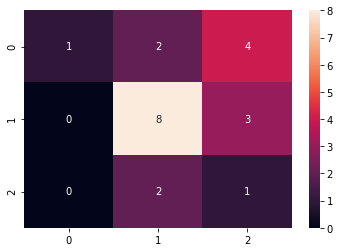

In [27]:
sns.heatmap(a, annot=True, fmt='d')

In [28]:
#k neigbour


In [29]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
b=metrics.accuracy_score(y_test, y_pred)

0.6666666666666666


In [30]:
k_range = range(2, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.8571428571428571, 0.7142857142857143, 0.7619047619047619, 0.6666666666666666, 0.7619047619047619, 0.7619047619047619, 0.7142857142857143, 0.7619047619047619, 0.6666666666666666, 0.6190476190476191, 0.6666666666666666, 0.6666666666666666, 0.7619047619047619, 0.7142857142857143, 0.6666666666666666, 0.7619047619047619, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.7619047619047619, 0.8095238095238095, 0.8095238095238095, 0.8095238095238095, 0.8095238095238095]


In [31]:
#decsiiontree
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)


In [32]:

drugTree.fit(x_train,y_train)
predTree = drugTree.predict(x_test)

In [33]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8095238095238095


In [34]:
a=metrics.accuracy_score(y_test, predTree)
print(a)

0.8095238095238095


In [35]:
#Random Forest

In [36]:

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train) 
 
# performing predictions on the test dataset
y_pred1 = clf.predict(x_test)
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred1))
e=metrics.accuracy_score(y_test, y_pred1)


ACCURACY OF THE MODEL:  0.6666666666666666


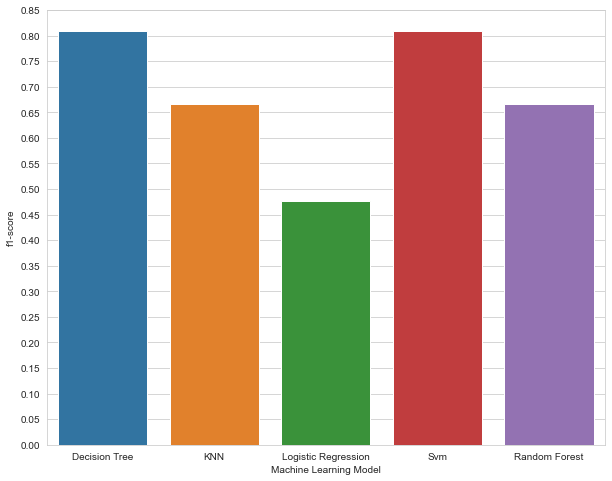

In [37]:
model = ['Decision Tree','KNN','Logistic Regression','Svm','Random Forest']
f1_score = [a,b,c,d,e]

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
plt.yticks(np.linspace(0,1,21))
plt.ylabel("f1-score")
plt.xlabel("Machine Learning Model")
sns.barplot(x= model,  y= f1_score)
plt.show()

In [102]:
from sklearn.metrics import f1_score

In [103]:
f1_dtree = f1_score(y_test,predTree,average='weighted')
f1_dtree
#yahan se baqi 5 ka kro

0.7924297924297923

array([0, 2, 1])

In [101]:
from sklearn.metrics import roc_auc_score
auc = metrics.roc_auc_score(y_train, y_pred)


ValueError: could not convert string to float: 'FWD'